In [11]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [12]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [13]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)
ssc.checkpoint( "file:///Users/ashok/Desktop/Untitled Folder")

In [4]:
socket_stream = ssc.socketTextStream("192.168.0.104", 5555)

In [5]:
lines = socket_stream.window( 20 )

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [7]:
( lines.flatMap( lambda text: text.split( " " ) )
  .filter( lambda word: word.lower().startswith("#") )
  .map( lambda word: ( word.lower(), 1 ) )
  .reduceByKey( lambda a, b: a + b )
  .map( lambda rec: Tweet( rec[0], rec[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
              .limit(10).registerTempTable("tweets") ) )

In [8]:
sqlContext

In [9]:
ssc.start()        

In [17]:
print lines

In [15]:
ls

0ce54c92-fb8c-4959-93c6-366bf86772c9/ checkpoint-1524609160000
3f357d56-79b2-4daf-b159-695e5e3ec84b/ checkpoint-1524609170000
652243fe-6a3d-46c6-8bf1-5d1fcc9ad49c/ checkpoint-1524609180000
70a064f5-b2d2-40bf-9e6c-743e980876df/ checkpoint-1524609190000
BDA-test.ipynb                        checkpoint-1524609200000
b2827ae0-450b-4f87-85bf-a8394b4e87e8/ e29e27bc-7b49-496b-8a4d-cafc43c56095/
checkpoint-1524609110000              receivedBlockMetadata/
checkpoint-1524609120000              tweet_count.csv
checkpoint-1524609130000              tweetread.py
checkpoint-1524609140000              twitter_feed_bda.ipynb
checkpoint-1524609150000


In [30]:
import pandas as pd
df = pd.read_csv('tweet_count.csv', index_col=0)
print df

        Count
Minute       
48         67
49         73
50         63
51         70
52         50
45          1
46         69
47         69


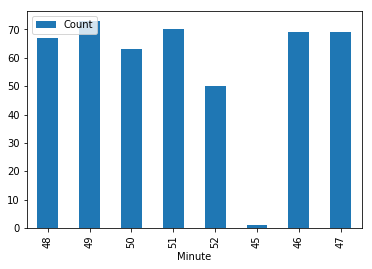

In [29]:
import pandas as pd
df = pd.read_csv('tweet_count.csv', index_col=0)
df.plot(kind='bar',x=df.index, y=df.columns)

In [34]:
# Average Count 
import pandas as pd
df = pd.read_csv('tweet_count.csv', index_col=0)
print "Average number of times mentioned: ", df['Count'].mean()

Average number of times mentioned:  57.75
